In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import jupyterthemes as jt
import statsmodels.api as sm
sb.set("notebook",font_scale=2.5)


In [2]:
def load_file(fname):
    df= pd.read_csv(fname)
    df.columns = pd.MultiIndex.from_tuples([i.split("_") for i in df.columns],
                                          names = ["trained on", "applied to"])
    return df

def do_violinplot(df,ax=None):
    sb.violinplot(ax=ax,data=df.melt(), 
                  hue="trained on", x="applied to", y="value", 
                  split=True, inner="quart", cut=0,
                  linewidth=1, palette={"m0":"b", "m3": ".85"})
    sb.despine(left=True)
    
def do_jointplot(df,applied_to="m0",height=12):
    thisdf = df.xs(applied_to,axis=1,level="applied to")
    axes = sb.jointplot(
        height=height,
        x="m0", y="m3",
        data=thisdf, kind="hex")
    plt.suptitle(f"applied to {applied_to}")
    straight_line = np.linspace(thisdf.min().max(), thisdf.max().min())
    res = sm.OLS(thisdf.m3, sm.add_constant(thisdf.m0)).fit()
    m3fit = sm.add_constant(thisdf.m0) @ res.params
    axes.ax_joint.plot(
        straight_line, straight_line,color="C1",lw=3, label="x=y")
    axes.ax_joint.plot(
        thisdf.m0, m3fit,color="C2",
        lw=3, label=f"a={res.params.m0:.3f} r^2={res.rsquared:.3f}")
    axes.ax_joint.legend(loc="best")
    plt.tight_layout()
    return res
    
def do_heatmap(dfdict):
    game_length_means = pd.concat(dfdict).groupby(level=0).mean()
    game_length_means = game_length_means.sort_index(level=0,axis=1)
    game_length_means.index.name = "p"
    sb.heatmap(game_length_means.T,annot=True)
   

We want to see what the difference is between an agent trained on mode 0 operating on mode 3 and an agent trained on mode 3 operating on mode 0. To this end, we run the same games for both and check the results.

In [3]:
fnames = ["./Blue_Data/df_0.65.csv", "./Blue_Data/df_0.7.csv","./Blue_Data/df_0.75.csv"]
df65 = load_file(fnames[0])
df70 = load_file(fnames[1])
df75 = load_file(fnames[2])


In [4]:
df65

trained on,m0,m3,m0,m3
applied to,m0,m3,m3,m0
0,11,2,19,3
1,4,1,2,9
2,36,5,4,9
3,18,7,11,32
4,2,5,7,6
...,...,...,...,...
995,24,1,11,5
996,35,3,10,25
997,10,4,9,26


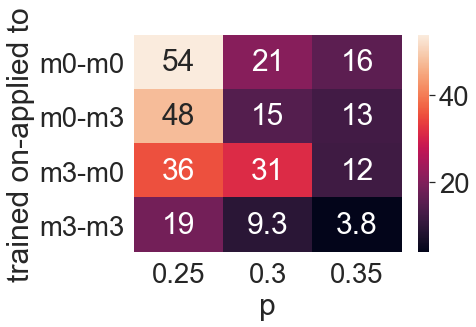

In [5]:
do_heatmap({0.35:df65, 0.3:df70, 0.25:df75})

This is very unusual and makes me think that something is wrong with the learning of mode 0. We see that the mode 3 agent does better on mode 0 than mode 0 does for p = 0.25 and p = 0.35, which does not make any sense. We can look to the distribution for more insight.

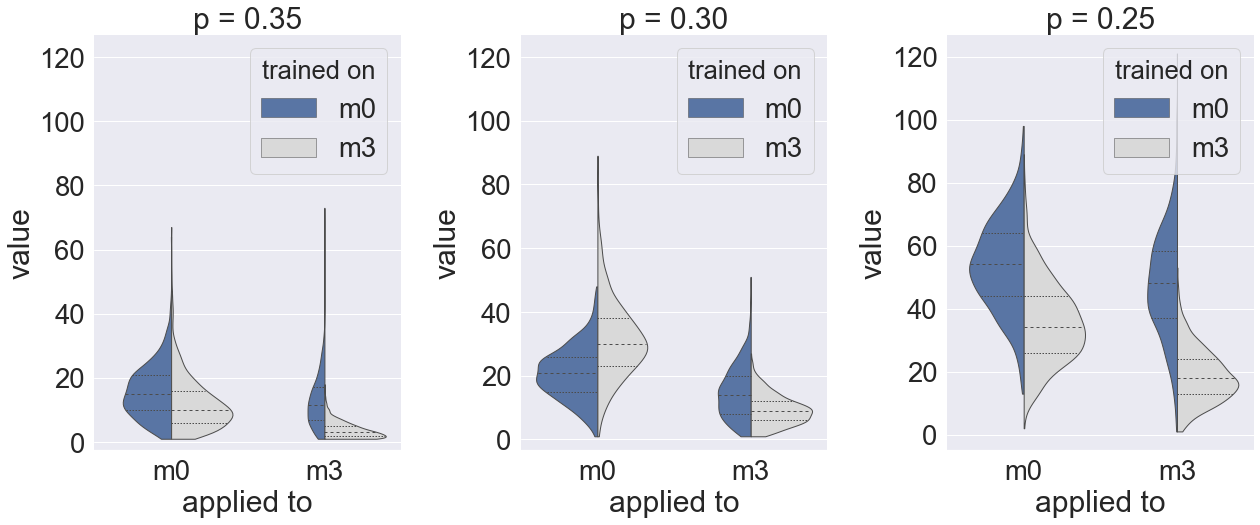

In [6]:
f,[a0,a1,a2] = plt.subplots(1,3,figsize=(18,8))
do_violinplot(df65,a0)
do_violinplot(df70,a1)
do_violinplot(df75,a2)
a0.set_title("p = 0.35")
a1.set_title("p = 0.30")
a2.set_title("p = 0.25")
plt.tight_layout()

maxylim=max([a.get_ylim()[1] for a in [a0,a1,a2]])
for a in [a0,a1,a2]:
    a.set_ylim(top=maxylim);


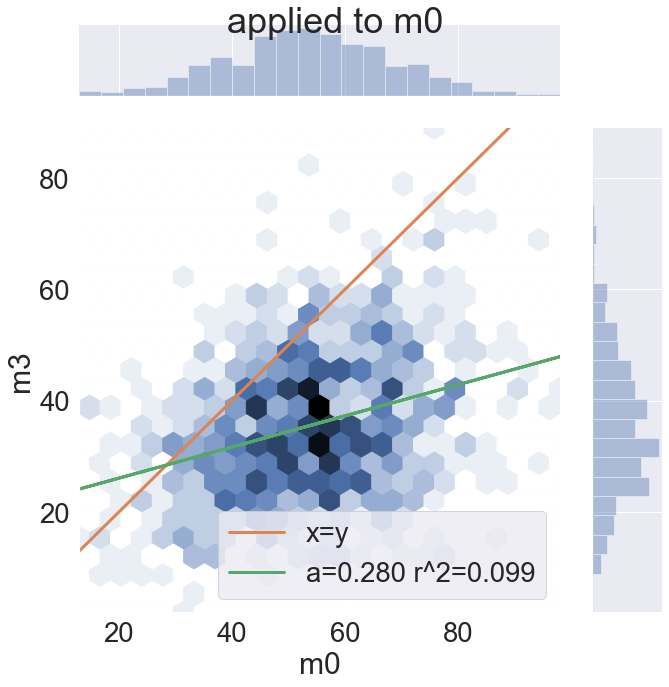

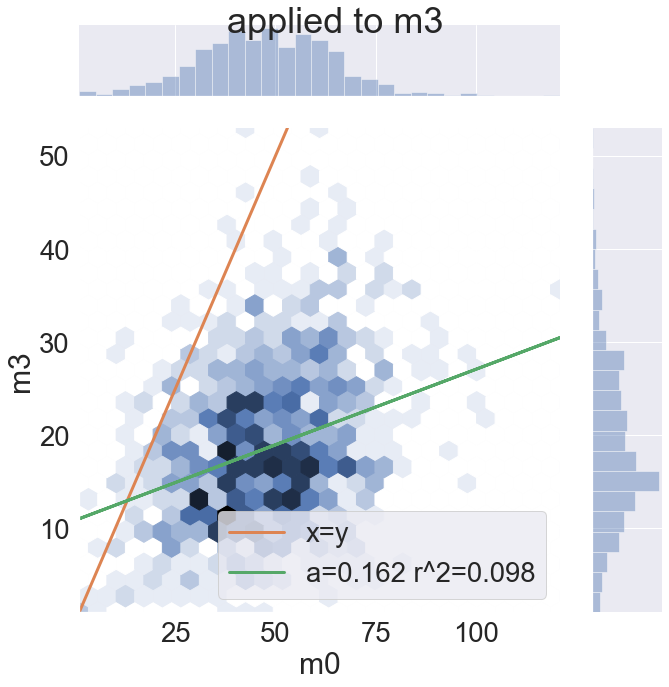

In [8]:
thisdf = do_jointplot(df75,"m0",height=10)
thisdf = do_jointplot(df75,"m3",height=10)

